<a href="https://colab.research.google.com/github/Sourav61/Goeduhub-Assignments/blob/main/Task_9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Author: <a href = "https://github.com/Sourav61">Sourav Pahwa</a>
<br>ID: GO_STP_13420

<b>Q) Predict retention of an employee within an organization such that whether the employee will leave the company or continue with it. An organization is only as good as its employees, and these people are the true source of its competitive advantage. Dataset is downloaded from Kaggle. Link: <a href="https://www.kaggle.com/giripujar/hr-analytics">https://www.kaggle.com/giripujar/hr-analytics")</a></b>

First do data exploration and visualization, after this create a logistic regression model to predict Employee Attrition Using Machine Learning & Python.

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import missingno as msno
import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv("HR_comma_sep.csv")

In [4]:
df.head(10)

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low
5,0.41,0.50,2,153,3,0,1,0,sales,low
6,0.10,0.77,6,247,4,0,1,0,sales,low
7,0.92,0.85,5,259,5,0,1,0,sales,low
8,0.89,1.00,5,224,5,0,1,0,sales,low
9,0.42,0.53,2,142,3,0,1,0,sales,low


In [5]:
df.tail(10)

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
14989,0.43,0.57,2,159,3,1,1,0,technical,low
14990,0.89,0.88,5,228,5,1,1,0,support,low
14991,0.09,0.81,6,257,4,0,1,0,support,low
14992,0.40,0.48,2,155,3,0,1,0,support,low
14993,0.76,0.83,6,293,6,0,1,0,support,low
14994,0.40,0.57,2,151,3,0,1,0,support,low
14995,0.37,0.48,2,160,3,0,1,0,support,low
14996,0.37,0.53,2,143,3,0,1,0,support,low
14997,0.11,0.96,6,280,4,0,1,0,support,low
14998,0.37,0.52,2,158,3,0,1,0,support,low


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   Department             14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


In [7]:
df.describe(include="all")

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999,14999
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10,3
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,sales,low
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4140,7316
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268,NaN,NaN
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281,NaN,NaN
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000,NaN,NaN
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000,NaN,NaN
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000,NaN,NaN
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000,NaN,NaN


In [8]:
df.kurt()

satisfaction_level       -0.670859
last_evaluation          -1.239040
number_project           -0.495478
average_montly_hours     -1.134982
time_spend_company        4.773211
Work_accident             2.085320
left                     -0.487060
promotion_last_5years    42.054957
dtype: float64

In [9]:
df.skew()

satisfaction_level      -0.476360
last_evaluation         -0.026622
number_project           0.337706
average_montly_hours     0.052842
time_spend_company       1.853319
Work_accident            2.021149
left                     1.230043
promotion_last_5years    6.636968
dtype: float64

In [10]:
df.keys()

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'left',
       'promotion_last_5years', 'Department', 'salary'],
      dtype='object')

In [11]:
df.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'left',
       'promotion_last_5years', 'Department', 'salary'],
      dtype='object')

In [12]:
df.axes

[RangeIndex(start=0, stop=14999, step=1),
 Index(['satisfaction_level', 'last_evaluation', 'number_project',
        'average_montly_hours', 'time_spend_company', 'Work_accident', 'left',
        'promotion_last_5years', 'Department', 'salary'],
       dtype='object')]

In [13]:
df.items()

<generator object DataFrame.items at 0x7f51db3dc4d0>

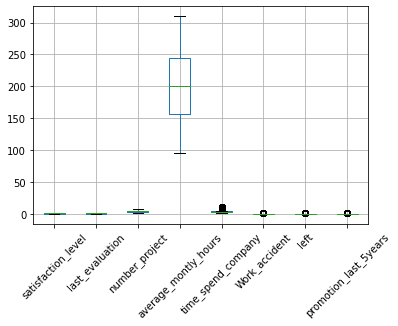

In [14]:
df.boxplot(rot=45)
plt.show()

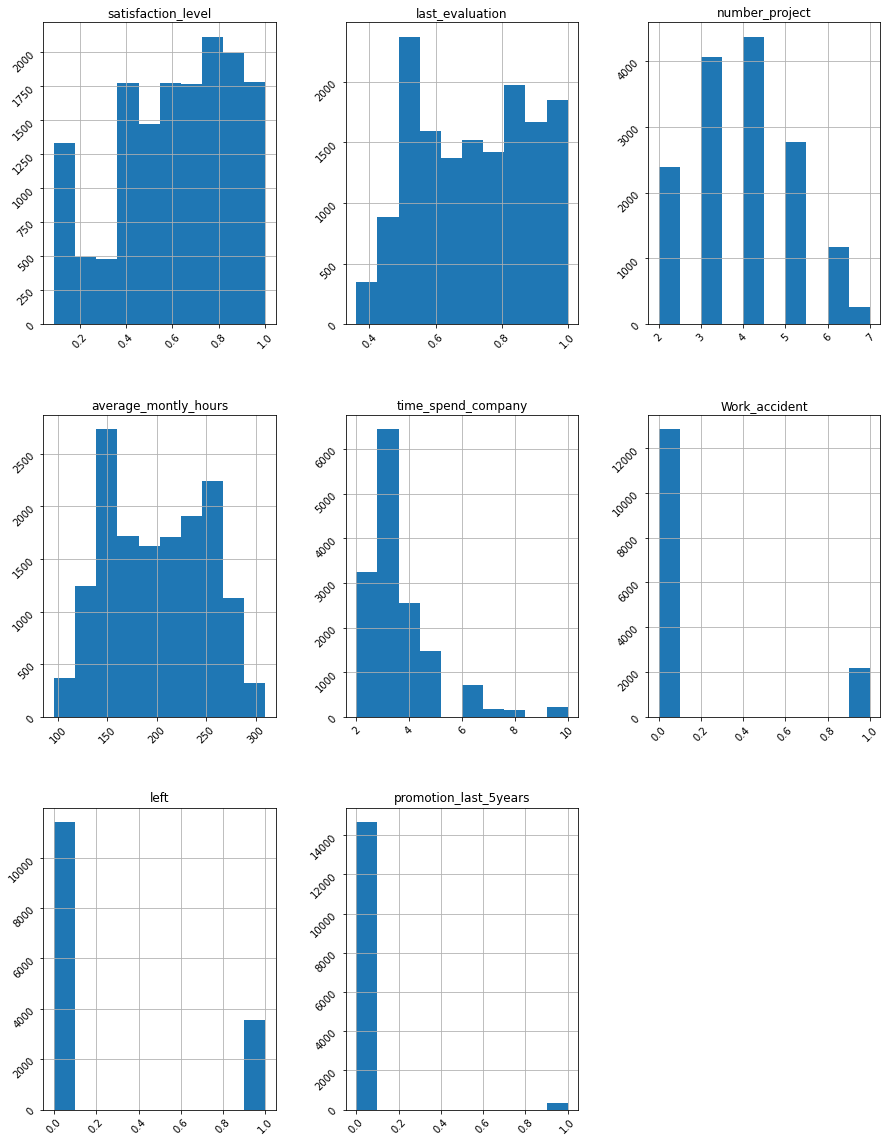

In [15]:
df.hist(figsize=(15,20),xrot=45,yrot=45)
plt.show()

In [16]:
df.dtypes

satisfaction_level       float64
last_evaluation          float64
number_project             int64
average_montly_hours       int64
time_spend_company         int64
Work_accident              int64
left                       int64
promotion_last_5years      int64
Department                object
salary                    object
dtype: object

In [17]:
df.duplicated().any()

True

In [18]:
df.duplicated().sum() 

3008

In [19]:
df.isna()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...
14994,False,False,False,False,False,False,False,False,False,False
14995,False,False,False,False,False,False,False,False,False,False
14996,False,False,False,False,False,False,False,False,False,False
14997,False,False,False,False,False,False,False,False,False,False


In [20]:
df.isnull().any()

satisfaction_level       False
last_evaluation          False
number_project           False
average_montly_hours     False
time_spend_company       False
Work_accident            False
left                     False
promotion_last_5years    False
Department               False
salary                   False
dtype: bool

In [21]:
df.isnull().sum()

satisfaction_level       0
last_evaluation          0
number_project           0
average_montly_hours     0
time_spend_company       0
Work_accident            0
left                     0
promotion_last_5years    0
Department               0
salary                   0
dtype: int64

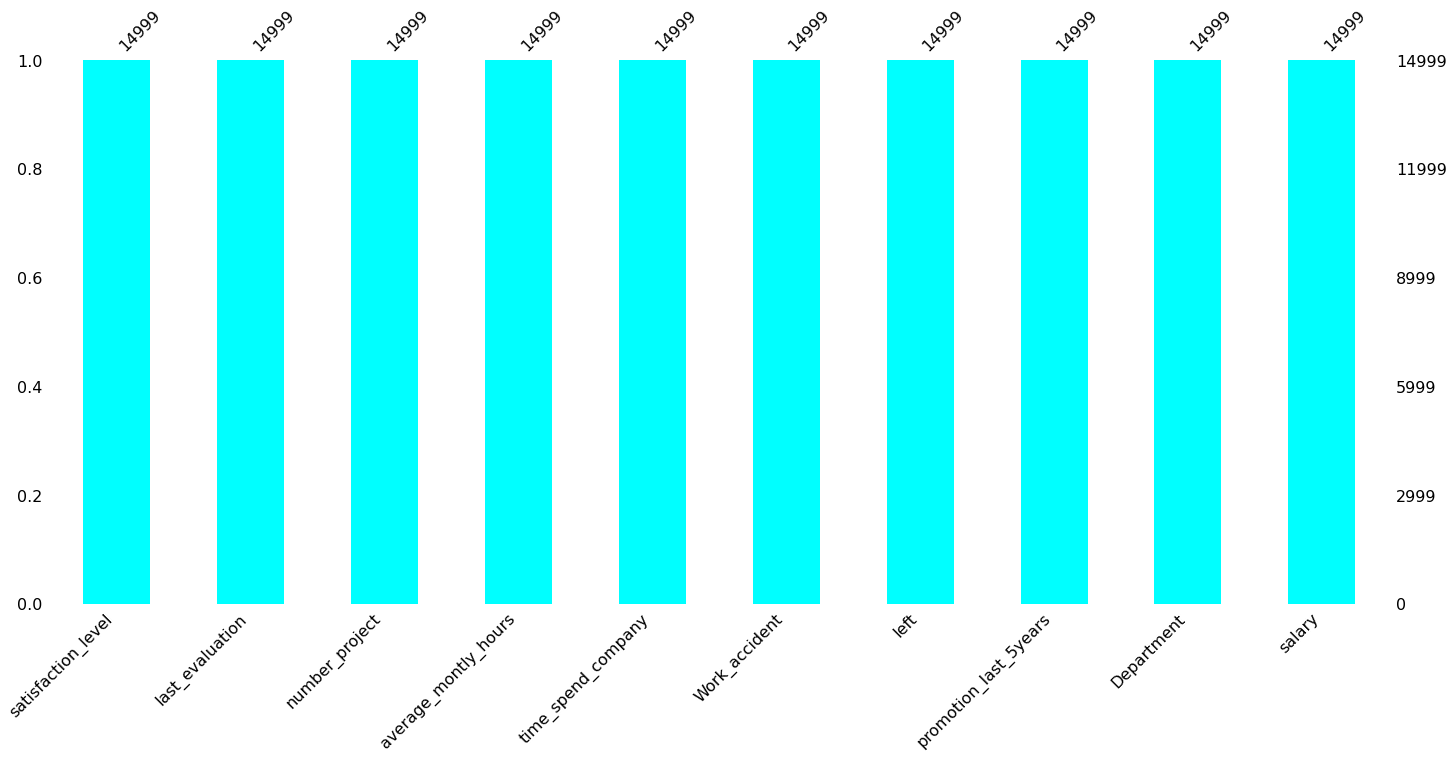

In [22]:
msno.bar(df.sample(14999),color="cyan")
plt.show()

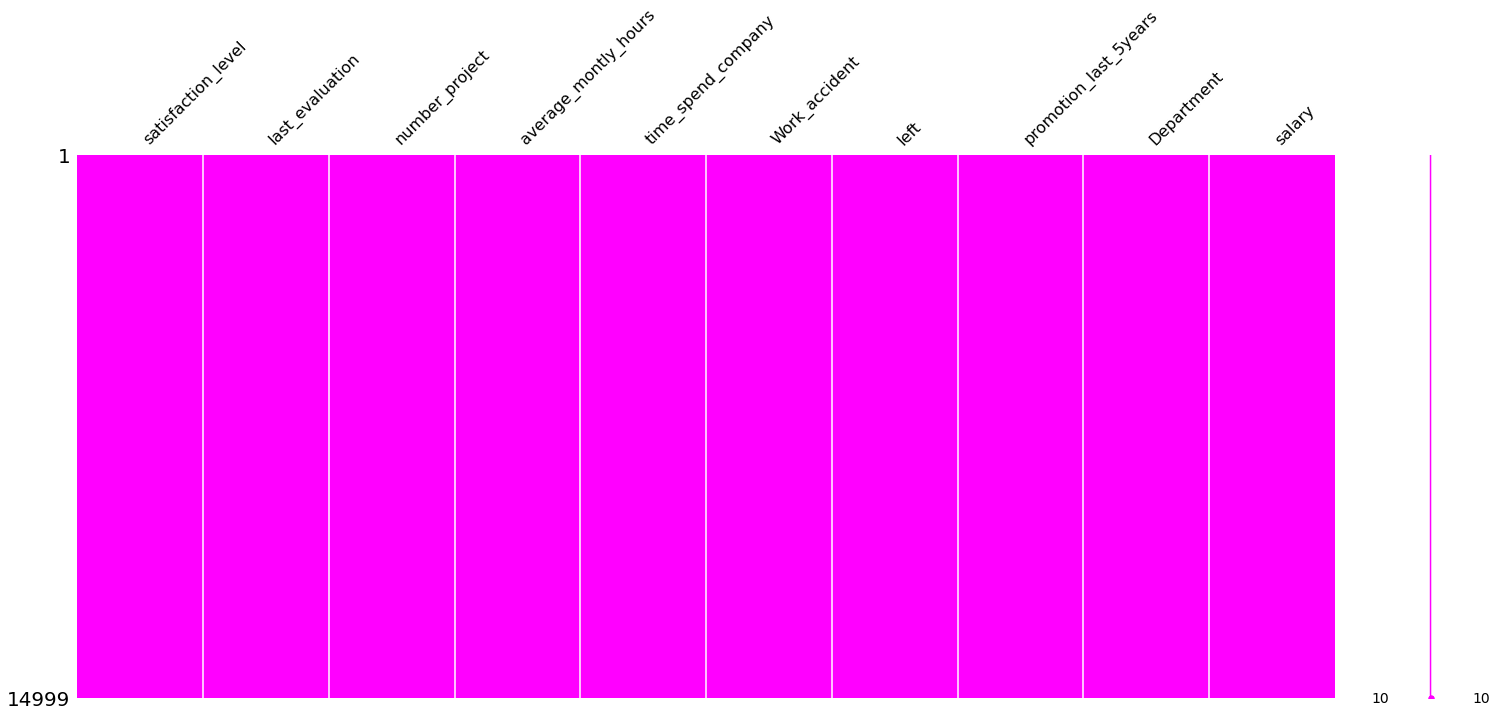

In [23]:
msno.matrix(df.sample(14999),color=(1, 0, 1))
plt.show()

In [24]:
df.corr()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
satisfaction_level,1.000000,0.105021,-0.142970,-0.020048,-0.100866,0.058697,-0.388375,0.025605
last_evaluation,0.105021,1.000000,0.349333,0.339742,0.131591,-0.007104,0.006567,-0.008684
number_project,-0.142970,0.349333,1.000000,0.417211,0.196786,-0.004741,0.023787,-0.006064
average_montly_hours,-0.020048,0.339742,0.417211,1.000000,0.127755,-0.010143,0.071287,-0.003544
time_spend_company,-0.100866,0.131591,0.196786,0.127755,1.000000,0.002120,0.144822,0.067433
Work_accident,0.058697,-0.007104,-0.004741,-0.010143,0.002120,1.000000,-0.154622,0.039245
left,-0.388375,0.006567,0.023787,0.071287,0.144822,-0.154622,1.000000,-0.061788
promotion_last_5years,0.025605,-0.008684,-0.006064,-0.003544,0.067433,0.039245,-0.061788,1.000000


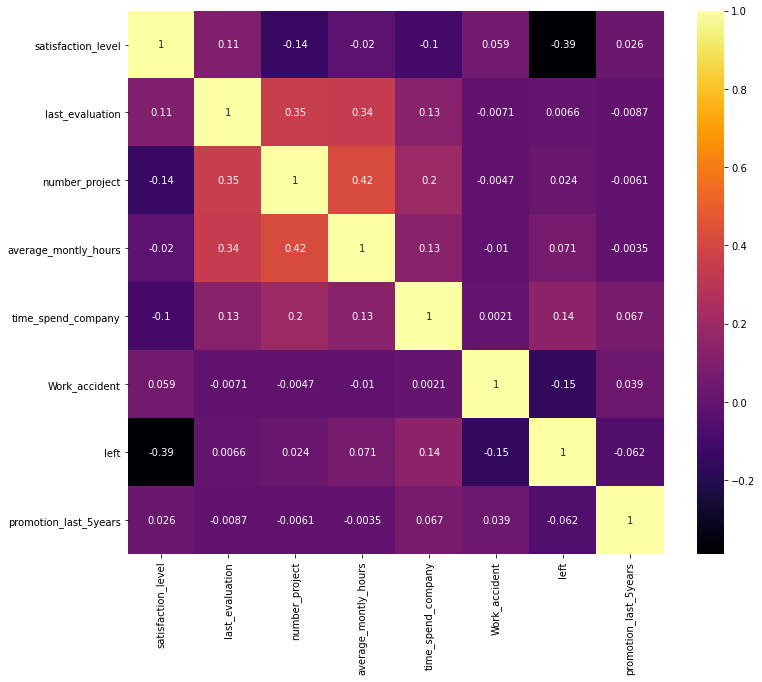

In [25]:
fig = plt.figure(figsize = (12,10))
sns.heatmap(df.corr(), cmap='inferno', annot = True) 
plt.show()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
satisfaction_level,1.000000,0.105021,-0.142970,-0.020048,-0.100866,0.058697,-0.388375,0.025605
last_evaluation,0.105021,1.000000,0.349333,0.339742,0.131591,-0.007104,0.006567,-0.008684
number_project,-0.142970,0.349333,1.000000,0.417211,0.196786,-0.004741,0.023787,-0.006064
average_montly_hours,-0.020048,0.339742,0.417211,1.000000,0.127755,-0.010143,0.071287,-0.003544
time_spend_company,-0.100866,0.131591,0.196786,0.127755,1.000000,0.002120,0.144822,0.067433
Work_accident,0.058697,-0.007104,-0.004741,-0.010143,0.002120,1.000000,-0.154622,0.039245
left,-0.388375,0.006567,0.023787,0.071287,0.144822,-0.154622,1.000000,-0.061788
promotion_last_5years,0.025605,-0.008684,-0.006064,-0.003544,0.067433,0.039245,-0.061788,1.000000


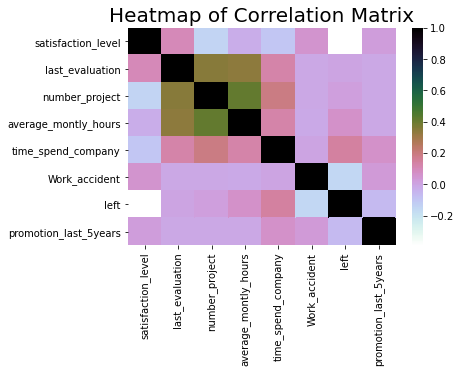

In [26]:
corr = df.corr()
sns.heatmap((corr),
xticklabels=corr.columns.values,
yticklabels=corr.columns.values,cmap='cubehelix_r',annot=False,fmt=".2g")
plt.title('Heatmap of Correlation Matrix', fontsize=20)
corr

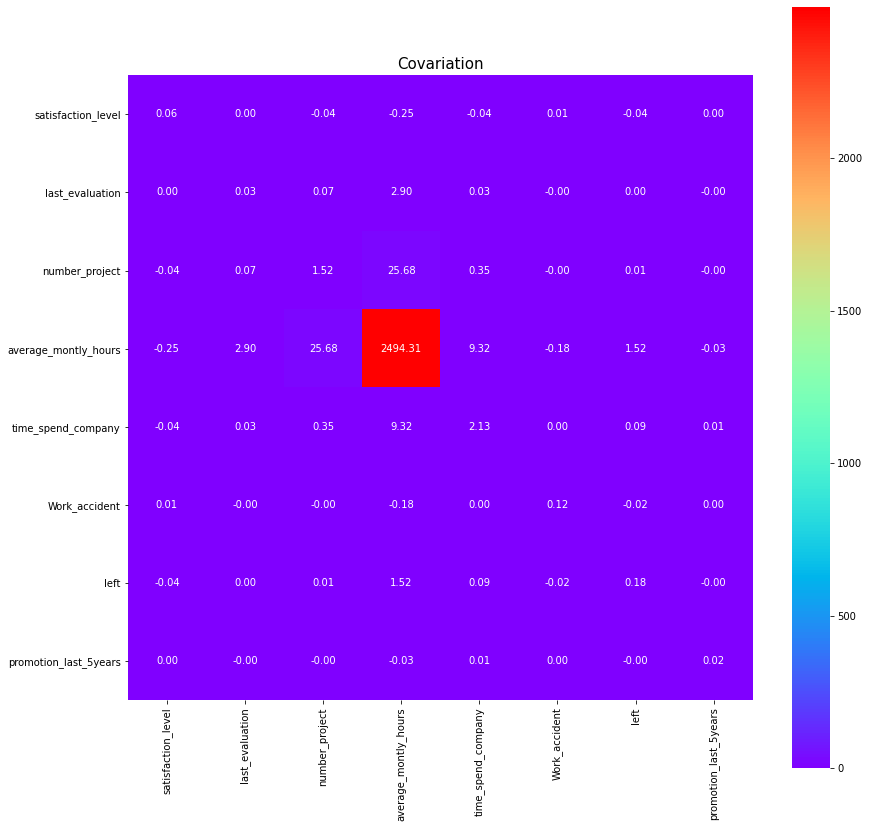

In [27]:
plt.figure(figsize=(14,14))
sns.heatmap(df.cov(), annot=True, fmt =".2f",square=True,cmap='rainbow')
plt.title("Covariation",fontsize = 15)
plt.show()

In [28]:
satisfaction_mean = df['satisfaction_level'].mean()
left_mean = df[df['left']==1]['satisfaction_level'].mean()
print( f'The mean for the employee population is: {satisfaction_mean}')
print( f'The mean for the employees that had left is: {left_mean}')

The mean for the employee population is: 0.6128335222348166
The mean for the employees that had left is: 0.44009801176140917


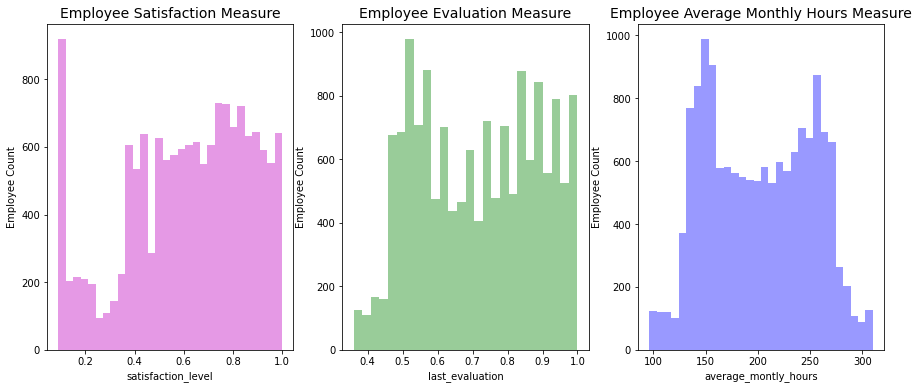

In [29]:
f, axes = plt.subplots(ncols=3, figsize=(15, 6))
sns.distplot(df.satisfaction_level, kde=False, color="m", ax=axes[0]).set_title('Employee Satisfaction Measure',fontsize=14)
axes[0].set_ylabel('Employee Count',fontsize=10)
sns.distplot(df.last_evaluation, kde=False, color="g", ax=axes[1]).set_title('Employee Evaluation Measure',fontsize=14)
axes[1].set_ylabel('Employee Count',fontsize=10)
sns.distplot(df.average_montly_hours, kde=False, color="b", ax=axes[2]).set_title('Employee Average Monthly Hours Measure',fontsize=14)
axes[2].set_ylabel('Employee Count',fontsize=10)
plt.show()

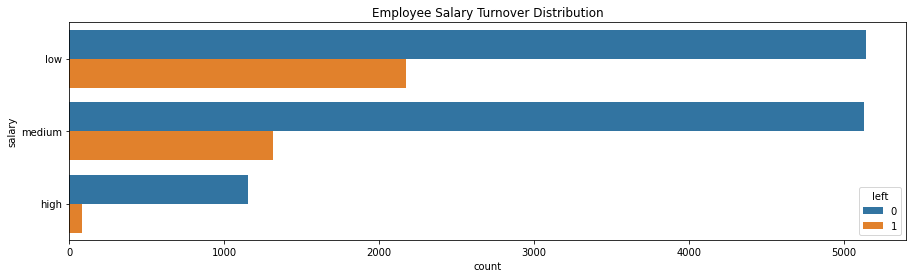

In [30]:
f, ax = plt.subplots(figsize=(15, 4))
sns.countplot(y="salary", hue='left', data=df).set_title('Employee Salary Turnover Distribution');

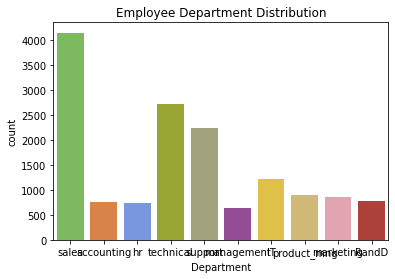

In [31]:
color_types = ['#78C850','#F08030','#6890F0','#A8B820','#A8A878','#A040A0','#F8D030',
'#E0C068','#EE99AC','#C03028','#F85888','#B8A038','#705898','#98D8D8','#7038F8']
sns.countplot(x='Department', data=df, palette=color_types).set_title('Employee Department Distribution');

In [32]:
data = df[['satisfaction_level','average_montly_hours','promotion_last_5years','salary']]
data.head(10)

,satisfaction_level,average_montly_hours,promotion_last_5years,salary
0,0.38,157,0,low
1,0.80,262,0,medium
2,0.11,272,0,medium
3,0.72,223,0,low
4,0.37,159,0,low
5,0.41,153,0,low
6,0.10,247,0,low
7,0.92,259,0,low
8,0.89,224,0,low
9,0.42,142,0,low


In [33]:
df1 = pd.get_dummies(data['salary'])
df1.head(10)

,high,low,medium
0,0,1,0
1,0,0,1
2,0,0,1
3,0,1,0
4,0,1,0
5,0,1,0
6,0,1,0
7,0,1,0
8,0,1,0
9,0,1,0


In [34]:
df1.tail(10)

,high,low,medium
14989,0,1,0
14990,0,1,0
14991,0,1,0
14992,0,1,0
14993,0,1,0
14994,0,1,0
14995,0,1,0
14996,0,1,0
14997,0,1,0
14998,0,1,0


In [35]:
merge = pd.concat([data,df1],axis='columns')
merge

,satisfaction_level,average_montly_hours,promotion_last_5years,salary,high,low,medium
0,0.38,157,0,low,0,1,0
1,0.80,262,0,medium,0,0,1
2,0.11,272,0,medium,0,0,1
3,0.72,223,0,low,0,1,0
4,0.37,159,0,low,0,1,0
...,...,...,...,...,...,...,...
14994,0.40,151,0,low,0,1,0
14995,0.37,160,0,low,0,1,0
14996,0.37,143,0,low,0,1,0
14997,0.11,280,0,low,0,1,0


In [36]:
merge.drop(['salary','high'], axis=1, inplace=True)
merge

,satisfaction_level,average_montly_hours,promotion_last_5years,low,medium
0,0.38,157,0,1,0
1,0.80,262,0,0,1
2,0.11,272,0,0,1
3,0.72,223,0,1,0
4,0.37,159,0,1,0
...,...,...,...,...,...
14994,0.40,151,0,1,0
14995,0.37,160,0,1,0
14996,0.37,143,0,1,0
14997,0.11,280,0,1,0


In [37]:
x = merge.copy()
x

,satisfaction_level,average_montly_hours,promotion_last_5years,low,medium
0,0.38,157,0,1,0
1,0.80,262,0,0,1
2,0.11,272,0,0,1
3,0.72,223,0,1,0
4,0.37,159,0,1,0
...,...,...,...,...,...
14994,0.40,151,0,1,0
14995,0.37,160,0,1,0
14996,0.37,143,0,1,0
14997,0.11,280,0,1,0


In [38]:
y = df['left']
y

0        1
1        1
2        1
3        1
4        1
        ..
14994    1
14995    1
14996    1
14997    1
14998    1
Name: left, Length: 14999, dtype: int64

In [39]:
from sklearn.model_selection import train_test_split

xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=.25, random_state=5)
print(xtrain.shape) 
print(xtest.shape)
print(ytrain.shape)
ytest.shape

(11249, 5)
(3750, 5)
(11249,)


(3750,)

In [40]:
from sklearn.linear_model import LogisticRegression
lm = LogisticRegression(solver='newton-cg')
lm.fit(xtrain,ytrain)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='newton-cg', tol=0.0001, verbose=0,
                   warm_start=False)

In [41]:
y_pred = lm.predict(xtest)
y_pred

array([0, 0, 1, ..., 0, 0, 0])

In [42]:
lm.score(xtest,ytest)

0.768

In [43]:
from sklearn.metrics import accuracy_score, confusion_matrix,plot_confusion_matrix,mean_squared_error, mean_absolute_error ,r2_score,  classification_report

In [44]:
accuracy_score(ytest,y_pred)

0.768

In [45]:
confusion_matrix(ytest,y_pred)

array([[2643,  188],
       [ 682,  237]])

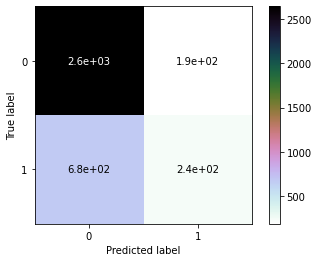

In [46]:
plot_confusion_matrix(lm, xtest, ytest,cmap=plt.cm.cubehelix_r)
plt.show()

In [47]:
print("The Mean Squared Error is: ", end=" ")
mse = mean_squared_error(y_pred,ytest)
print(mse)
print("The Mean Absolute Error is: ", end=" ")
mae = mean_absolute_error(y_pred, ytest)
print(mae)

The Mean Squared Error is:  0.232
The Mean Absolute Error is:  0.232


In [48]:
print('The R2 Score is: %0.2f ' % r2_score(ytest, y_pred))

The R2 Score is: -0.25 


In [49]:
print(classification_report(ytest,y_pred))

              precision    recall  f1-score   support

           0       0.79      0.93      0.86      2831
           1       0.56      0.26      0.35       919

    accuracy                           0.77      3750
   macro avg       0.68      0.60      0.61      3750
weighted avg       0.74      0.77      0.73      3750



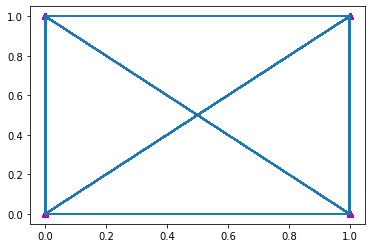

In [50]:
plt.scatter(ytest, y_pred,c='m', marker="^")
plt.plot(ytest, lm.predict(xtest))
plt.show()